<a href="https://colab.research.google.com/github/KetakiN/20-21/blob/main/NYSDOHmodelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
import time

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
dfo=pd.read_csv('/content/sample_data/nysdoh_feature.csv')

In [ ]:
dfo=dfo.drop('Unnamed: 0',axis=1)

In [ ]:
dfo.dtypes

Hospital_Service_Area              object
Hospital_County                    object
Facility_Name                      object
Age_Group                           int64
Zip_Code__3_digits                 object
Gender                             object
Race                               object
Length_of_Stay                    float64
Type_of_Admission                  object
CCS_Diagnosis_Description          object
CCS_Procedure_Description          object
Payment_Typology_1                 object
Emergency_Department_Indicator     object
Below_Above_mean                   object
length_groups                      object
MeanLOS_byD                       float64
MeanLOS_byP                       float64
dtype: object

In [ ]:
dfo.shape

(118049, 17)

In [ ]:
filepath='/content/sample_data/nysdoh_feature.csv'

In [ ]:
#chunk_size=50000
#df1=pd.DataFrame()
#for chunk in pd.read_csv(filepath,chunksize=chunk_size,low_memory=False):
 #   df2=chunk.sample(frac=0.05)
 #   df=pd.concat([df1, df2])
 #  df1=df

In [ ]:
#df.shape

In [ ]:
#df=df.drop('Unnamed: 0',axis=1)

In [ ]:
#df.columns

In [ ]:
#X=df.drop(['Length_of_Stay',
        #'Below_Above_mean', 'length_groups',
       #'MeanLOS_byD', 'MeanLOS_byP'],axis=1)

In [ ]:
#X=pd.get_dummies(X,drop_first=True)

In [ ]:
#X.shape

In [ ]:
#y=df['length_groups']

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:

# Number of trees in random forest
#n_estimators = [int(x) for x in range(100,350,50)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [50,100]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

#print(random_grid)

In [ ]:
# check code time
#time_start=time.perf_counter()
# Use the random grid to search for best hyperparameters
# Instantiate the Random Forest Classifier
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)
#time_end=time.perf_counter()

In [ ]:
#print((time_end-time_start)/60)

In [ ]:
#rf_random.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
#best_rf=rf_random.best_estimator_

In [ ]:
#y_pred = best_rf.predict(X_test)
#accuracy = metrics.accuracy_score(y_test, y_pred)
#print (accuracy)

    



0.6130397967823878

In [ ]:
# appply these parameters on the bigger sample (dfo), exclude meanLOS in X, and y is multiclass length groups

In [ ]:
X=dfo.drop(['Length_of_Stay',
        'Below_Above_mean', 'length_groups',
       'MeanLOS_byD', 'MeanLOS_byP'],axis=1)

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
y=dfo['length_groups']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
time_start=time.perf_counter()
model = RandomForestClassifier(n_estimators=300, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=False, n_jobs=-1, random_state=42,max_depth=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
time_end=time.perf_counter()

In [ ]:
print((time_end-time_start)/60)

5.685204607116657


In [ ]:

print(confusion_matrix(y_test, y_pred))

print(metrics.accuracy_score(y_test, y_pred))

[[  504  2811     0   161     0]
 [  264 12630     4   986     0]
 [    2   303    50   442     1]
 [   26  3255    23  2112     0]
 [    0    14     1    21     0]]
0.6478610758153325


30


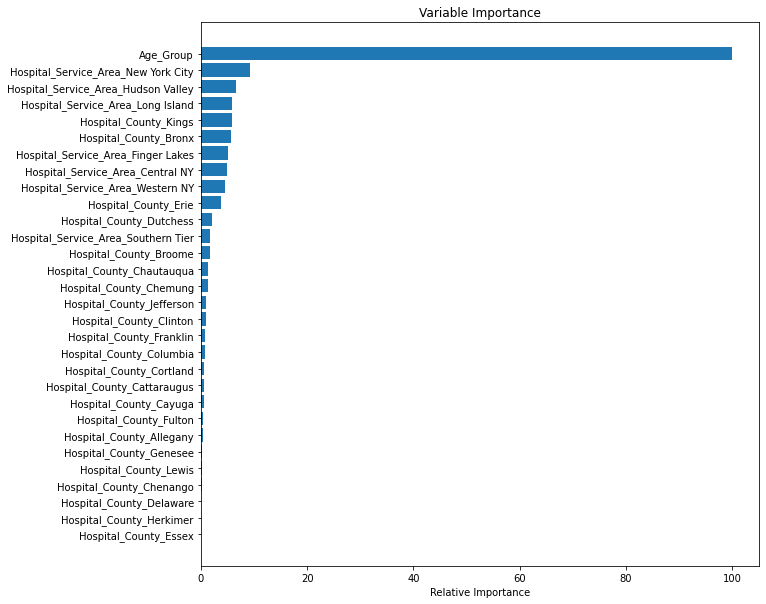

In [ ]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

apply theses parameters but use the binary length groups as the y target variable for classification

In [ ]:
y=dfo['Below_Above_mean']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
time_start=time.perf_counter()
model = RandomForestClassifier(n_estimators=300, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=False, n_jobs=-1, random_state=42,max_depth=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
time_end=time.perf_counter()
print((time_end-time_start)/60)

5.855514137266664


In [ ]:
print(confusion_matrix(y_test, y_pred))

print(metrics.accuracy_score(y_test, y_pred))

[[ 2675  3575]
 [ 1101 16259]]
0.8019483269800932


30


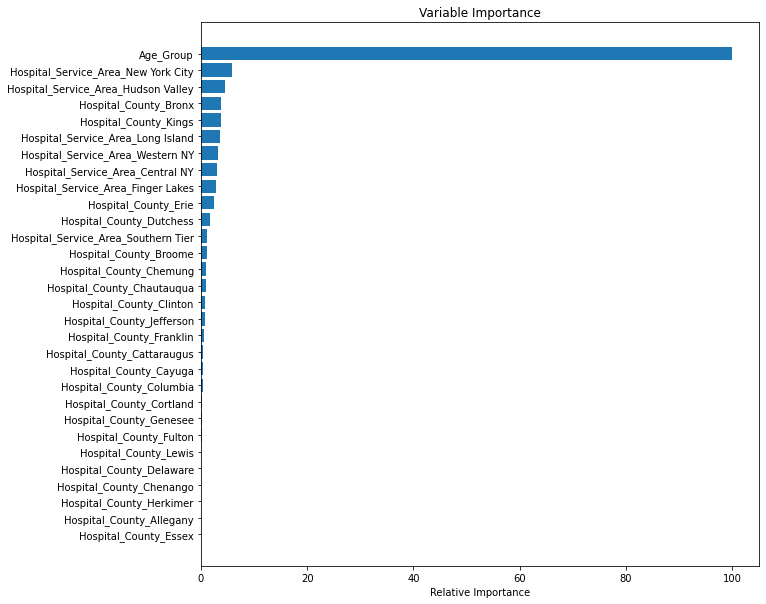

In [ ]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#apply same parameters, include mean LOS columns in X,keep y as binary groups

In [ ]:
X=dfo.drop(['Length_of_Stay',
        'Below_Above_mean', 'length_groups',
       ],axis=1)

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
time_start=time.perf_counter()
model = RandomForestClassifier(n_estimators=300, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=False, n_jobs=-1, random_state=42,max_depth=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
time_end=time.perf_counter()
print((time_end-time_start)/60)

5.000689837783344


In [ ]:
print(confusion_matrix(y_test, y_pred))

print(metrics.accuracy_score(y_test, y_pred))

[[ 3013  3237]
 [ 1313 16047]]
0.8072850487081745


30


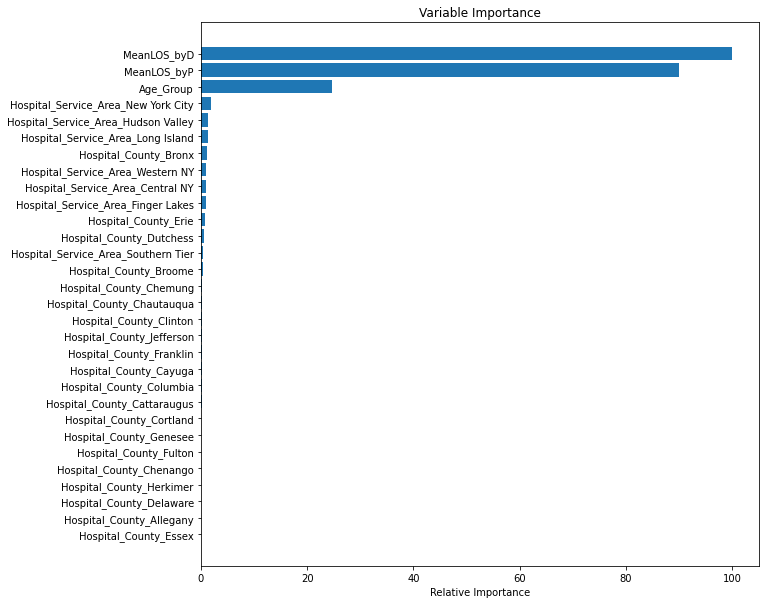

In [ ]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()